Using the iPython notebook to do some fitting
---------------------------------------------

First, import many useful functions, handy for interactive use.  I'll also switch to inline plots, to keep everything in one window. But use %matplotlib qt to get interactive plots.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize

Find the data file, import it, extract the first and second columns (x and y data), then plot to see what we have

In [2]:
%cd ~/Labs

/Users/guneraygin/Labs


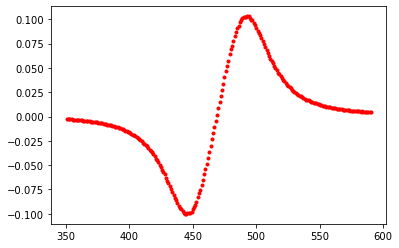

In [3]:
dat = np.loadtxt('/Users/guneraygin/Desktop/University/Y3 Labs/ESR/Other Data/bestest_data(1mA points).txt')
xdat = dat[:, 0]

ydat = dat[:, 1]
plt.plot(xdat, ydat, 'r.')

Define a function for the derivative of a lorentzian, with parameters for amplitude and offset.
$$y = A \frac{16 (x-x_0) \Gamma}{\pi (4 (x-x_0)^2 + \Gamma^2)} + C $$ 

In [4]:
def lorentz_deriv(x, x0, gamma, ampl, offset):
    return ampl * 16 * (x-x0) * gamma / (np.pi *(4*(x-x0)**2 + gamma**2)) + offset

Need to import the fitting library

In [5]:
from scipy import optimize

Estimate the parameters and perform the fit

In [6]:
guess = [480, 50, 1e-3, 0]
params, covariances = optimize.curve_fit(lorentz_deriv, xdat, ydat, guess)

Plot the fitted function on top of the data points

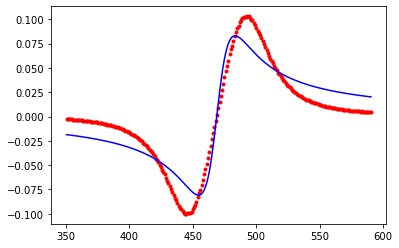

In [7]:
yfit = lorentz_deriv(xdat, *params)
plt.plot(xdat, ydat, 'r.')
plt.plot(xdat, yfit, 'b-')

Let's try again with a gaussian derivative,
$$ y = A \frac{exp \frac{-(x-x_0)^2}{2\sigma^2} (x-x_0) }{ \sqrt{2 \pi} \sigma^3} + C $$

In [8]:
def gauss_deriv(x, x0, sigma, ampl, offset):
    return  ampl * np.exp(-(x-x0)**2 / (2 * sigma**2)) * (x-x0) /(np.sqrt(2*np.pi)*sigma**3) + offset

In [9]:
guess = [480, 2.86, 1e-3, 0]
params2, cov2 = optimize.curve_fit(gauss_deriv, xdat, ydat, guess)

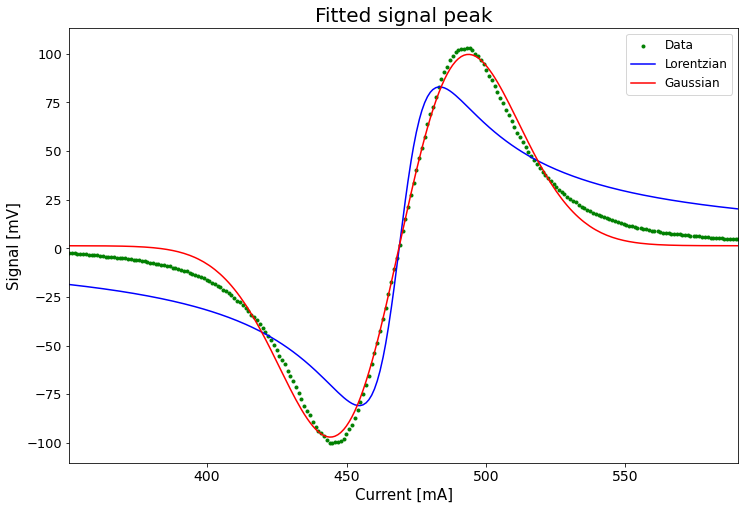

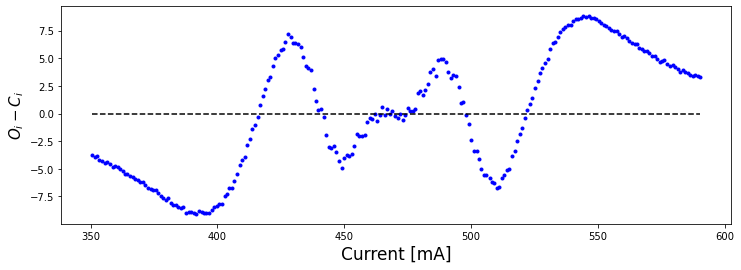

In [10]:
yfit2 = gauss_deriv(xdat, *params2)
fig = plt.figure(figsize=(12,8))
plt.scatter(xdat, 1e3*ydat, color='green', marker='.', label='Data')
plt.plot(xdat, 1e3*yfit, 'b-', label='Lorentzian')
plt.plot(xdat, 1e3*yfit2, 'r-', label='Gaussian')
plt.title('Fitted signal peak', size=20)
plt.ylabel('Signal [mV]',size=15)
plt.xlim(np.min(xdat), np.max(xdat))
plt.xlabel('Current [mA]',size=15)
plt.legend(loc = 'best', prop={'size':12})
plt.xticks(size=14)
plt.yticks(size=13)
plt.show()
#plt.savefig('Fitted Signal.png')
residuals = 1e3*ydat - 1e3*yfit2
fig = plt.figure(figsize=(12,4))
plt.scatter(xdat,residuals, color='blue',marker='.')
plt.plot(np.linspace(np.min(xdat),np.max(xdat),100), np.zeros(100), 'k--')
plt.xlabel('Current [mA]', size=17)
plt.ylabel('$O_i - C_i$', size=15)
plt.savefig('fitted_signal_res.png')
plt.show()

So it looks more Gaussian than Lorentzian.  Let's see the fitted parameters

In [11]:
print(params) 
print(params2)

[4.68936285e+02 2.88499287e+01 6.43724936e-02 1.05376558e-03]
[4.68934035e+02 2.47810982e+01 2.49752191e+02 1.31572834e-03]


An separate plot window will help print just the graph

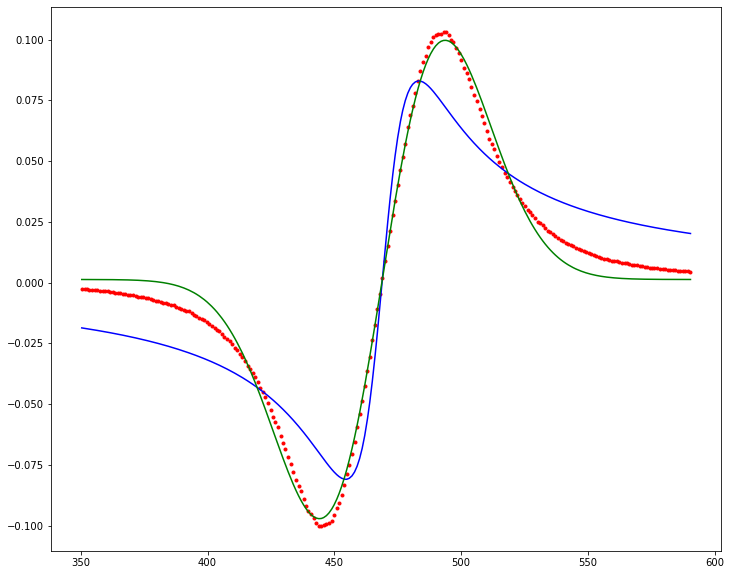

In [12]:
fig = plt.figure(figsize=(12,10))
plt.plot(xdat, ydat, 'r.')
plt.plot(xdat, yfit, 'b-')
plt.plot(xdat, yfit2, 'g-')

## Attempting Voigt function

In [13]:
def gauss(x,x0,sigma,ampl,offset):
    return 1/(sigma * np.sqrt(2*np.pi)) * np.exp(-(x-x0)**2/2*sigma**2) + offset

def lorentz(x,x0,gamma,ampl,offset):
    return 1/np.pi * (0.5*gamma/((x-x0)**2 + 0.5*gamma**2)) + offset

In [14]:
def voigt_deriv(x, x0, sigma, gamma, ampl, offset):
    return (gauss_deriv(x,x0,sigma,ampl,offset) * lorentz(x,x0,gamma,ampl,offset)) + (lorentz_deriv(x,x0,gamma,ampl,offset)*gauss(x,x0,sigma,ampl,offset))

In [15]:
guess = [469, 3, 1.5, 5e-3, 1e-3]
params3, cov3 = optimize.curve_fit(voigt_deriv, xdat, ydat, guess)

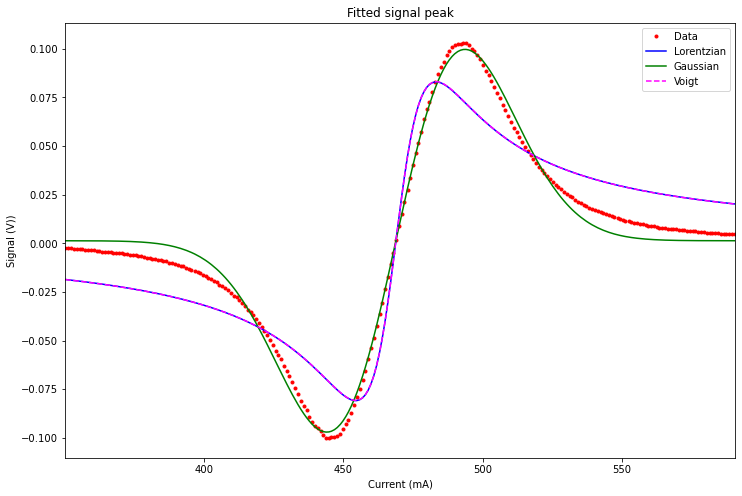

In [16]:
yfit3 = voigt_deriv(xdat, *params3)
fig = plt.figure(figsize=(12,8))
plt.plot(xdat, ydat, 'r.', label='Data')
plt.plot(xdat, yfit, 'b-', label='Lorentzian')
plt.plot(xdat, yfit2, 'g-', label='Gaussian')
plt.plot(xdat, yfit3, color='magenta', linestyle='dashed',label='Voigt')
plt.title('Fitted signal peak')
plt.ylabel('Signal (V))')
plt.xlim(np.min(xdat), np.max(xdat))
plt.xlabel('Current (mA)')
plt.legend(loc = 'best')
plt.savefig('Voigt Signal.png')

In [17]:
from sympy import *

In [18]:
'''
yfit3 = voigt_deriv(xdat, *params3)
yfit3_prime = yfit3[0].diff(xdat)
fig = plt.figure(figsize=(12,8))
plt.plot(xdat, ydat, 'r.', label='Data')
plt.plot(xdat, yfit, 'b-', label='Lorentzian')
plt.plot(xdat, yfit2, 'g-', label='Gaussian')
plt.plot(xdat, yfit3, color='magenta', label='Voigt')
plt.title('Fitted signal peak')
plt.ylabel('Signal (V))')
plt.xlim(np.min(xdat), np.max(xdat))
plt.xlabel('Current (mA)')
plt.legend(loc = 'best')
#plt.savefig('Fitted Signal.png')
'''

AttributeError: 'numpy.float64' object has no attribute 'diff'